In [4]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [1]:

opp_shot_file = '/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/update_opponent_shot_range/update_opp_shot_range%s.csv'
shot_sel_file = '/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/update_shot_range/update_shot_range%s.csv'
avg_file = '/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/player_avgs/player_average_%s.csv'
unassisted_file = '/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/unassisted_stats/unassisted_stats%s.csv'
bios_file = '/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/player_bios/player_bios%s.csv'
schedule_file = '/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/team_schedule/team_schedule%s.csv'
pace_pie_file = '/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/pace_pie/pace_pie%s.csv'
files = [opp_shot_file,shot_sel_file, avg_file,unassisted_file, bios_file, schedule_file, pace_pie_file]

In [2]:
# not including years of nba lockout 98-99, 2011-12
years = ['2015-16', '2014-15', '2013-14', '2012-13', '2010-11', '2009-10', '2008-09', 
         '2007-08', '2006-07', '2005-06', '2004-05', '2003-04', '2002-03', '2001-02',
         '2000-01', '1999-00', '1997-98', '1996-97']
lockout = ['1998-99', '2011-12']
all_dfs = {}
lockout_yrs = {}
for y in years:
    all_dfs[y] = []
for y in lockout:
    lockout_yrs[y] = []
all_dfs

{'1996-97': [],
 '1997-98': [],
 '1999-00': [],
 '2000-01': [],
 '2001-02': [],
 '2002-03': [],
 '2003-04': [],
 '2004-05': [],
 '2005-06': [],
 '2006-07': [],
 '2007-08': [],
 '2008-09': [],
 '2009-10': [],
 '2010-11': [],
 '2012-13': [],
 '2013-14': [],
 '2014-15': [],
 '2015-16': []}

In [5]:
for f in files:
    for y in years:
        csv_file = f % y
        df = pd.read_csv(csv_file)
        df.drop([x for x in df.columns if x.startswith('Unnamed:')], axis=1,inplace=True)
        all_dfs[y].append(df)
        
    for y in lockout:
        csv_file = f % y
        df = pd.read_csv(csv_file)
        df.drop([x for x in df.columns if x.startswith('Unnamed:')], axis=1,inplace=True)
        lockout_yrs[y].append(df)

# for y in years:
#     print y
#     for df in all_dfs[y]:
#         print df.shape
#         print df.columns
        
#     print "==============="
# # for df in all_dfs['2015-16']:
# #     print df.shape, df.columns
# #     print "==========="
# # Merged data frames

all_dfs

{'1996-97': [     PLAYER_ID            PLAYER_NAME       TEAM_ID TEAM_ABBREVIATION   AGE  \
  0          471                    NaN           NaN               NaN   NaN   
  1          920             A.C. Green  1.610613e+09               DAL  33.0   
  2          243            Aaron McKie  1.610613e+09               DET  24.0   
  3         1425         Aaron Williams  1.610613e+09               VAN  25.0   
  4          768              Acie Earl  1.610613e+09               MIL  27.0   
  5          228             Adam Keefe  1.610613e+09               UTA  27.0   
  6          154        Adrian Caldwell  1.610613e+09               PHI  30.0   
  7          673         Alan Henderson  1.610613e+09               ATL  24.0   
  8         1059  Aleksandar Djordjevic  1.610613e+09               POR  29.0   
  9          275          Allan Houston  1.610613e+09               NYK  26.0   
  10         947          Allen Iverson  1.610613e+09               PHI  22.0   
  11         297 

In [71]:
# checking 1999-00 and 2000-01
for i in range(len(all_dfs['1999-00'])):
    print all_dfs['1999-00'][i].shape,  all_dfs['2000-01'][i].shape

(439, 9) (441, 9)
(439, 21) (441, 21)
(439, 36) (441, 36)
(439, 28) (441, 28)
(439, 10) (441, 10)
(29, 5) (29, 5)
(439, 5) (441, 5)


In [76]:
total_merged_per_year = {}

for y in years:
    df_list = all_dfs[y]
    merged_shot_selection = pd.merge(df_list[1], df_list[0], 
            on=['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE','SEASON'])
    merged_avg_assisted = pd.merge(df_list[2], df_list[3], 
            on=['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP','W', 'L', 'W_PCT', 'MIN', 'SEASON'])
    merged_bios_schedule =  pd.merge(df_list[4], df_list[5], on=['TEAM_ABBREVIATION'])
    all_merged = pd.merge(merged_avg_assisted, merged_shot_selection, 
                          on=['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'SEASON']).merge(merged_bios_schedule, 
            on=['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'SEASON']).merge(df_list[6], 
            on=['PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE'])
    
# 35ft and above, double-double and triple-double count are dropped 
    drop_columns = ['CFID_x','CFID_y','CFPARAMS_x', 'CFPARAMS_y', 'DD2', 'TD3']

    all_merged.drop(drop_columns, axis=1, inplace=True)
    
    all_merged.to_csv('/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/merged_per_year/merged_%s.csv' % y)
    total_merged_per_year[y] = all_merged

In [74]:
total_merged_per_year['2015-16']

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,NET_RATING,USG_PCT,TS_PCT,B2B_COUNT,3GMS_IN_4DAYS,4GMS_IN_5DAYS,PACE,PIE
0,201166,Aaron Brooks,1610612741,CHI,31.0,69,36,33,0.522,16.1,...,72,161,-1.4,0.231,0.494,17,24,1,97.22,0.073
1,203932,Aaron Gordon,1610612753,ORL,20.0,78,32,46,0.410,23.9,...,81,220,-1.3,0.171,0.541,19,27,1,98.87,0.113
2,1626151,Aaron Harrison,1610612766,CHA,21.0,21,15,6,0.714,4.4,...,78,210,2.2,0.138,0.371,16,24,0,102.89,0.013
3,203940,Adreian Payne,1610612750,MIN,25.0,52,18,34,0.346,9.3,...,82,237,-10.8,0.180,0.422,14,22,2,96.48,0.039
4,201143,Al Horford,1610612737,ATL,30.0,82,48,34,0.585,32.1,...,82,245,4.9,0.206,0.565,19,27,2,99.75,0.137
5,2744,Al Jefferson,1610612766,CHA,31.0,47,33,14,0.702,23.3,...,82,289,3.7,0.245,0.507,16,24,0,97.68,0.124
6,202329,Al-Farouq Aminu,1610612757,POR,25.0,82,44,38,0.537,28.5,...,81,215,1.5,0.169,0.533,19,25,2,99.01,0.088
7,101187,Alan Anderson,1610612764,WAS,33.0,13,8,5,0.615,14.8,...,78,220,5.4,0.157,0.495,20,26,1,100.19,0.066
8,1626210,Alan Williams,1610612756,PHX,23.0,10,3,7,0.300,6.8,...,80,260,-0.2,0.201,0.481,14,22,1,107.52,0.110
9,202692,Alec Burks,1610612762,UTA,24.0,31,13,18,0.419,25.7,...,78,214,-2.0,0.251,0.520,18,22,1,95.52,0.099


In [31]:
pd.read_csv('/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/merged_per_year/merged_%s' % '2001-02')

,Unnamed: 0,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,...,TS_PCT,B2B_COUNT,3GMS_IN_4DAYS,4GMS_IN_5DAYS,SEASON,PLAYER_NAME,TEAM_ABBREVIATION,AGE,PACE,PIE


In [30]:
total_merged_per_year

{'1996-97': Empty DataFrame
 Columns: [GP, W, L, W_PCT, MIN, FGM, FGA, FG_PCT, FG3M, FG3A, FG3_PCT, FTM, FTA, FT_PCT, OREB, DREB, REB, AST, TOV, STL, BLK, BLKA, PF, PFD, PTS, PLUS_MINUS, PCT_FGA_2PT, PCT_FGA_3PT, PCT_PTS_2PT, PCT_PTS_2PT_MR, PCT_PTS_3PT, PCT_PTS_FB, PCT_PTS_FT, PCT_PTS_OFF_TOV, PCT_PTS_PAINT, PCT_AST_2PM, PCT_UAST_2PM, PCT_AST_3PM, PCT_UAST_3PM, PCT_AST_FGM, PCT_UAST_FGM, opp_lessthan5ft_FGM, opp_lessthan5ft_FGA, opp_lessthan5ft_FG_PCT, lessthan5ft_FGM, lessthan5ft_FGA, lessthan5ft_FG_PCT, 5_9ft_FGM, 5_9ft_FGA, 5_9ft_FG_PCT, 10_14ft_FGM, 10_14ft_FGA, 10_14ft_FG_PCT, 15_19ft_FGM, 15_19ft_FGA, 15_19ft_FG_PCT, 20_24ft_FGM, 20_24ft_FGA, 20_24ft_FG_PCT, PLAYER_ID, TEAM_ID, PLAYER_HEIGHT_INCHES, PLAYER_WEIGHT, NET_RATING, USG_PCT, TS_PCT, B2B_COUNT, 3GMS_IN_4DAYS, 4GMS_IN_5DAYS, SEASON, PLAYER_NAME, TEAM_ABBREVIATION, AGE, PACE, PIE]
 Index: []
 
 [0 rows x 75 columns], '1997-98': Empty DataFrame
 Columns: [GP, W, L, W_PCT, MIN, FGM, FGA, FG_PCT, FG3M, FG3A, FG3_PCT, FTM, FT

In [25]:
df = pd.concat(total_merged_per_year)
df.to_csv('/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/FINAL_MERGED.csv')

In [25]:
# i = 0
# for y in years:
#     i += total_merged_per_year[y].shape[0]
    
# print i
# print df.shape

8157

In [26]:
df.columns

Index([u'GP', u'W', u'L', u'W_PCT', u'MIN', u'FGM', u'FGA', u'FG_PCT', u'FG3M',
       u'FG3A', u'FG3_PCT', u'FTM', u'FTA', u'FT_PCT', u'OREB', u'DREB',
       u'REB', u'AST', u'TOV', u'STL', u'BLK', u'BLKA', u'PF', u'PFD', u'PTS',
       u'PLUS_MINUS', u'PCT_FGA_2PT', u'PCT_FGA_3PT', u'PCT_PTS_2PT',
       u'PCT_PTS_2PT_MR', u'PCT_PTS_3PT', u'PCT_PTS_FB', u'PCT_PTS_FT',
       u'PCT_PTS_OFF_TOV', u'PCT_PTS_PAINT', u'PCT_AST_2PM', u'PCT_UAST_2PM',
       u'PCT_AST_3PM', u'PCT_UAST_3PM', u'PCT_AST_FGM', u'PCT_UAST_FGM',
       u'opp_lessthan5ft_FGM', u'opp_lessthan5ft_FGA',
       u'opp_lessthan5ft_FG_PCT', u'lessthan5ft_FGM', u'lessthan5ft_FGA',
       u'lessthan5ft_FG_PCT', u'5_9ft_FGM', u'5_9ft_FGA', u'5_9ft_FG_PCT',
       u'10_14ft_FGM', u'10_14ft_FGA', u'10_14ft_FG_PCT', u'15_19ft_FGM',
       u'15_19ft_FGA', u'15_19ft_FG_PCT', u'20_24ft_FGM', u'20_24ft_FGA',
       u'20_24ft_FG_PCT', u'PLAYER_ID', u'TEAM_ID', u'PLAYER_HEIGHT_INCHES',
       u'PLAYER_WEIGHT', u'NET_RATING', u'USG_

In [29]:
df[(df.PLAYER_NAME=='Kobe Bryant') & (df.GP > 10)].GP.plot(kind='bar')

TypeError: Empty 'DataFrame': no numeric data to plot

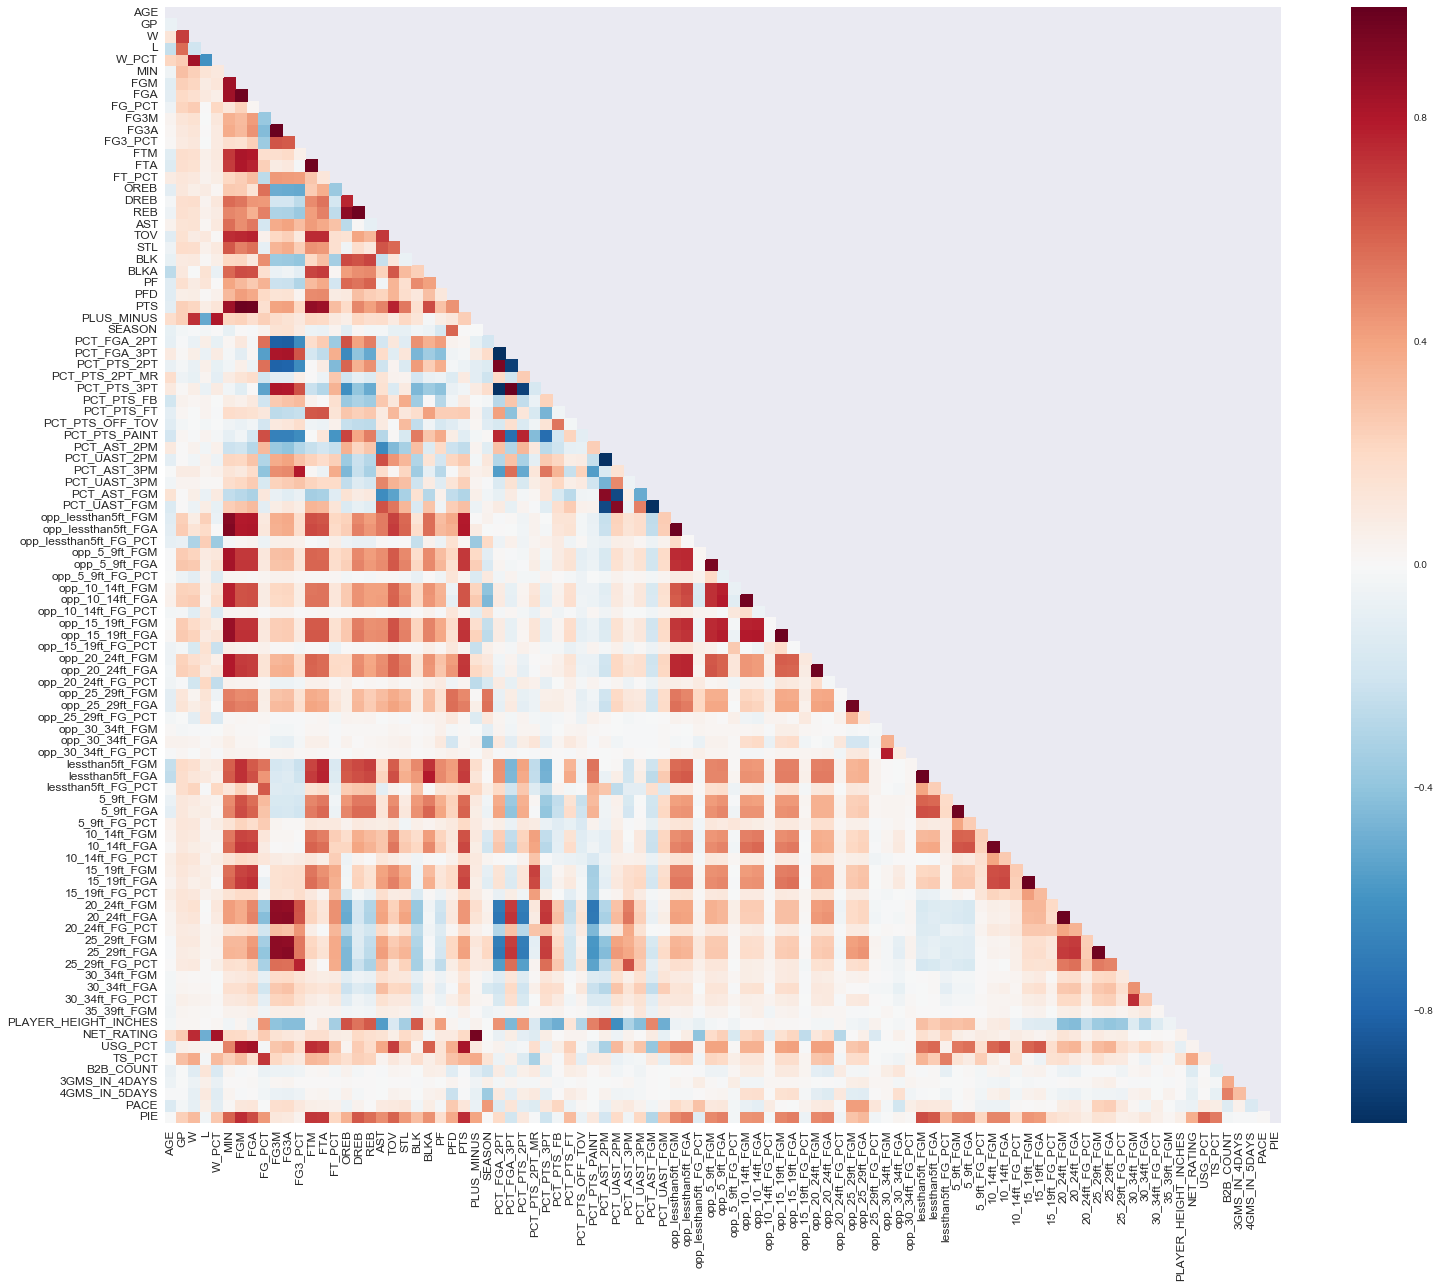

In [38]:
all_corr = df[df.MIN > 15.].iloc[:,3:].corr()

# Set the default matplotlib figure size to 7x7:
plt.rcParams['figure.figsize']=(25,20)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(all_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(all_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()


In [44]:
df[(df.SEASON >=2001) & (df.SEASON <= 2006)].sort_values('GP')

PLAYER_ID            PLAYER_NAME       TEAM_ID TEAM_ABBREVIATION  \
2003-04 96         344            Dana Barros  1.610613e+09               BOS   
2006-07 363     200970          Renaldo Major  1.610613e+09               GSW   
2005-06 68         935          Bryon Russell  1.610613e+09               DEN   
        13        1541         Alvin Williams  1.610613e+09               TOR   
2006-07 445     101144              Von Wafer  1.610613e+09               LAC   
2005-06 10        2637            Alex Scales  1.610613e+09               SAS   
2002-03 120        690               Don Reid  1.610613e+09               DET   
2001-02 330        753            Randy Brown  1.610613e+09               BOS   
2005-06 332       2403                   Nene  1.610613e+09               DEN   
2002-03 77        2442            Chris Owens  1.610613e+09               MEM   
2004-05 52        2688         Brandin Knight  1.610613e+09               HOU   
2001-02 335       2237            Ratko Varda  1.610613e+09               DET   
2005-06 345       2750        Pavel Podkolzin  1.610613e+09               DAL   
2003-04 249       1910             Leon Smith  1.610613e+09               SEA   
        382       2582          Slavko Vranes  1.610613e+09               POR   
2001-02 120         54        Dickey Simpkins  1.610613e+09               ATL   
2006-07 92        2402          Dajuan Wagner  1.610613e+09               GSW   
        13        1541         Alvin Williams  1.610613e+09               LAC   
2005-06 229       1886        Jonathan Bender  1.610613e+09               IND   
2003-04 315       1727            Pat Garrity  1.610613e+09               ORL   
2006-07 240       2030          Kenyon Martin  1.610613e+09               DEN   
2005-06 125       2583      Derrick Zimmerman  1.610613e+09               NJN   
2001-02 257       1683         Larry Robinson  1.610613e+09               NYK   
2003-04 6         2682            Alex Garcia  1.610613e+09               SAS   
2001-02 141        386           Elliot Perry  1.610613e+09               MEM   
2003-04 362       2415          Ryan Humphrey  1.610613e+09               MEM   
2002-03 311       2321           Paul Shirley  1.610613e+09               ATL   
2004-05 28         292         Anthony Miller  1.610613e+09               ATL   
2005-06 120     101184               Deng Gai  1.610613e+09               PHI   
2002-03 347       2257  Ruben Boumtje-Boumtje  1.610613e+09               POR   
...                ...                    ...           ...               ...   
2006-07 289     101110        Martell Webster  1.610613e+09               POR   
2003-04 53        1477            Bruce Bowen  1.610613e+09               SAS   
        231        954          Kerry Kittles  1.610613e+09               NJN   
        232        708          Kevin Garnett  1.610613e+09               MIN   
        233       1563            Kevin Ollie  1.610613e+09               CLE   
2002-03 54        1477            Bruce Bowen  1.610613e+09               SAS   
2006-07 73        2294           Charlie Bell  1.610613e+09               MIL   
2002-03 50         258            Brian Grant  1.610613e+09               MIA   
2003-04 245         84       Latrell Sprewell  1.610613e+09               MIN   
2005-06 23        2804         Andres Nocioni  1.610613e+09               CHI   
2002-03 9          947          Allen Iverson  1.610613e+09               PHI   
2003-04 268       1548            Mark Blount  1.610613e+09               BOS   
2005-06 318       1710             Mike Bibby  1.610613e+09               SAC   
2006-07 66        2568         Carlos Delfino  1.610613e+09               DET   
        310       1710             Mike Bibby  1.610613e+09               SAC   
2005-06 141       2730          Dwight Howard  1.610613e+09               ORL   
2002-03 13        2405      Amar'e Stoudemire  1.610613e+09               PHX   
2005-06 306       2246            Mehmet Oku

In [ ]:
sns.pairplot(demo)